# Using Neural Network Predict the gender given the name

Importing Required libraries

In [12]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras import preprocessing
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras import regularizers
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

Reading data from csv file stored in github

In [13]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [14]:
df_male = pd.read_csv("https://gist.githubusercontent.com/mbejda/7f86ca901fe41bc14a63/raw/38adb475c14a3f44df9999c1541f3a72f472b30d/Indian-Male-Names.csv")
df_female = pd.read_csv("https://gist.githubusercontent.com/mbejda/9b93c7545c9dd93060bd/raw/b582593330765df3ccaae6f641f8cddc16f1e879/Indian-Female-Names.csv")

Extracting required columns i.e name and gender

In [15]:
df = pd.concat([df_male,df_female])
data = df[['name','gender']].values
x = data[:,:-1]
y = data[:,1:]
print(x)
print(y)

[['barjraj']
 ['ramdin verma']
 ['sharat chandran']
 ...
 ['manju d/0 baboo lal jatav']
 ['shivani']
 ['nayna']]
[['m']
 ['m']
 ['m']
 ...
 ['f']
 ['f']
 ['f']]


Data Visualization:

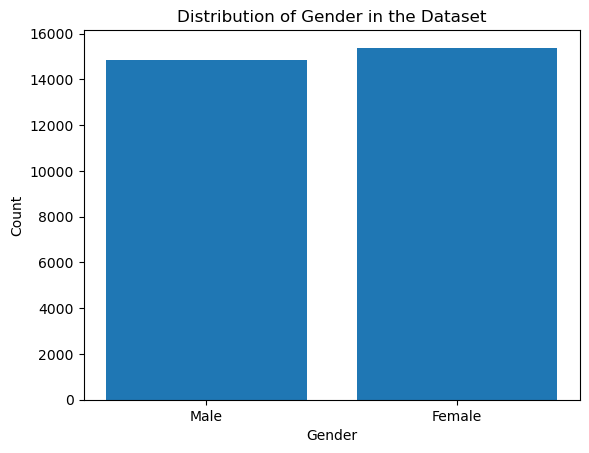

In [16]:
gender_count={"Male":np.count_nonzero(y=='m'),"Female":np.count_nonzero(y=='f')}
# Plot the distribution of genders
plt.bar(gender_count.keys(), gender_count.values())
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Gender in the Dataset')
plt.show()

As some names may contain full name, splitting to get just first name

In [17]:
# Define a function to extract the first name
def extract_first_name(full_name):
    return str(full_name).split()[0]

# Convert elements to strings and apply the function to each element in the array
x = np.vectorize(extract_first_name, otypes=[str])(x)
print(x)
print(y)

[['barjraj']
 ['ramdin']
 ['sharat']
 ...
 ['manju']
 ['shivani']
 ['nayna']]
[['m']
 ['m']
 ['m']
 ...
 ['f']
 ['f']
 ['f']]


Calculate the name with maximum length

In [18]:
def get_max_length(names):
    max_length = max(len(name) for name in names)
    return max_length

max_length = get_max_length(x.reshape(-1))
print("Maximum Length: ",max_length)

Maximum Length:  23


Doing Binary one hot encoding to convert each name to max_length * 26 size

In [19]:
def one_hot_encoding(names,max_length):
    names = np.char.lower(names)
    x = np.zeros((names.shape[0],max_length,26))
    for i in range(0,names.shape[0]):
        for j in range(0,len(names[i,0])):
            if(names[i,0][j]>='a' and names[i,0][j]<='z'):
                char_index = ord(names[i,0][j])-ord('a')
                x[i,j,char_index] = 1.0
    return x

Converting y from m,f to 0,1 respectively
Normalizing x values
Converting x values of 2d array to 1d array of 23*26, to pass to neural input layer

In [20]:
x_encoded = one_hot_encoding(x,max_length)
norm_l = tf.keras.layers.Normalization(axis=-1)
norm_l.adapt(x_encoded)  # learns mean, variance
normalized_model = Sequential([norm_l]);
normalized_model.compile()
x_norm = normalized_model(x_encoded)
y_int = np.where(y=='m',0,1)
x_norm = x_norm.numpy()
print(x_norm.shape)
print(y_int.shape)
x_norm = x_norm.reshape(30227,23*26)
x_norm.shape

(30227, 23, 26)
(30227, 1)


(30227, 598)

Splitting the dataset to training and test dataset in 66% and 33%

In [21]:
X_train, X_test,Y_train, Y_test = train_test_split(x_norm,y_int,test_size=0.33,random_state=42)
print(X_train.shape)
print(X_test.shape)

(20252, 598)
(9975, 598)


Creating a neural network model

In [22]:
model = Sequential([
    Dense(598,'relu',kernel_regularizer = regularizers.L2(1e-3)),
    Dense(54,'relu',kernel_regularizer = regularizers.L2(1e-3)),
    Dense(1,'linear',kernel_regularizer = regularizers.L2(1e-3))
])

model.compile(loss=BinaryCrossentropy(from_logits = True),optimizer = tf.keras.optimizers.Adam(learning_rate=0.001))
history = model.fit(X_train,Y_train,epochs=100,batch_size=64, validation_data=(X_test, Y_test))

Epoch 1/100
317/317 [==============================] - 3s 7ms/step - loss: 0.6398 - val_loss: 0.4776
Epoch 2/100
317/317 [==============================] - 2s 8ms/step - loss: 0.4162 - val_loss: 0.4199
Epoch 3/100
317/317 [==============================] - 3s 8ms/step - loss: 0.3633 - val_loss: 0.3905
Epoch 4/100
317/317 [==============================] - 2s 8ms/step - loss: 0.3334 - val_loss: 0.3765
Epoch 5/100
317/317 [==============================] - 3s 8ms/step - loss: 0.3118 - val_loss: 0.3735
Epoch 6/100
317/317 [==============================] - 4s 12ms/step - loss: 0.2963 - val_loss: 0.3568
Epoch 7/100
317/317 [==============================] - 3s 10ms/step - loss: 0.2877 - val_loss: 0.3453
Epoch 8/100
317/317 [==============================] - 4s 12ms/step - loss: 0.2732 - val_loss: 0.3503
Epoch 9/100
317/317 [==============================] - 4s 13ms/step - loss: 0.2641 - val_loss: 0.3324
Epoch 10/100
317/317 [==============================] - 4s 12ms/step - loss: 0.2538 - v

317/317 [==============================] - 1s 4ms/step - loss: 0.1876 - val_loss: 0.3333
Epoch 82/100
317/317 [==============================] - 1s 4ms/step - loss: 0.1877 - val_loss: 0.3313
Epoch 83/100
317/317 [==============================] - 1s 4ms/step - loss: 0.1876 - val_loss: 0.3345
Epoch 84/100
317/317 [==============================] - 1s 4ms/step - loss: 0.1884 - val_loss: 0.3262
Epoch 85/100
317/317 [==============================] - 1s 4ms/step - loss: 0.1890 - val_loss: 0.3322
Epoch 86/100
317/317 [==============================] - 1s 4ms/step - loss: 0.1870 - val_loss: 0.3272
Epoch 87/100
317/317 [==============================] - 1s 4ms/step - loss: 0.1857 - val_loss: 0.3266
Epoch 88/100
317/317 [==============================] - 1s 4ms/step - loss: 0.1870 - val_loss: 0.3292
Epoch 89/100
317/317 [==============================] - 1s 4ms/step - loss: 0.1863 - val_loss: 0.3376
Epoch 90/100
317/317 [==============================] - 1s 4ms/step - loss: 0.1871 - val_loss: 

Printing model summary

In [23]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 598)               358202    
                                                                 
 dense_4 (Dense)             (None, 54)                32346     
                                                                 
 dense_5 (Dense)             (None, 1)                 55        
                                                                 
Total params: 390,603
Trainable params: 390,603
Non-trainable params: 0
_________________________________________________________________


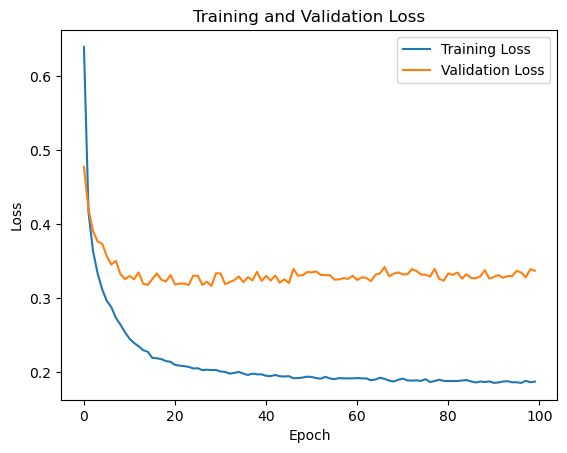

In [24]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

Predicting using test dataset, and printing F1 score, precision, recall, accuracy

In [25]:
Y_pred = model.predict(X_test)
Y_pred = tf.nn.sigmoid(Y_pred)
Y_pred = Y_pred.numpy()
Y_pred = np.where(Y_pred<=0.5,0,1)
f1 = f1_score(Y_test, Y_pred)
precision = precision_score(Y_test,Y_pred)
recall = recall_score(Y_test,Y_pred)
accuracy = accuracy_score(Y_test, Y_pred)
print("F1 score:", f1)
print("Precision: ", precision)
print("Recall: ",recall)
print("Accuracy: ",accuracy)

312/312 [==============================] - 0s 1ms/step
F1 score: 0.9081048508586924
Precision:  0.9203990228013029
Recall:  0.8961347869177403
Accuracy:  0.9082706766917293


Defining a function to predict the gender, given 2d numpy array of names

In [26]:
def predict(x_user):
    x_user = one_hot_encoding(name,23)
    x_user = normalized_model(x_user).numpy()
    x_user = x_user.reshape(x_user.shape[0],23*26)
    y_user = model.predict(x_user)
    y_user = tf.nn.sigmoid(y_user)
    y_user = y_user.numpy()
    #print(y_user)
    y_user = np.where(y_user>0.5,'F','M')
    return y_user

Predicting the gender, based on name by calling predict function and print name and gender

In [27]:
name = np.array([['Sweta'],['Shubham'],['Rohit'],['Anchal'],
                 ['Sakshi'],['Rahul'],['Gaurishankar'],
                 ['Radhe'],['Radha'],['Aryan'],['Ashwin'],['laddu'],['Nishtha']])
gender = predict(name)
for i in range(name.shape[0]):
    print(f'{name[i,0]}\t{gender[i,0]}')

1/1 [==============================] - 0s 14ms/step
Sweta	F
Shubham	M
Rohit	M
Anchal	F
Sakshi	F
Rahul	M
Gaurishankar	M
Radhe	M
Radha	F
Aryan	M
Ashwin	M
laddu	M
Nishtha	F


In [17]:
model.save('name_gender_model')
normalized_model.save("ng_normalized_model")

INFO:tensorflow:Assets written to: name_gender_model\assets
INFO:tensorflow:Assets written to: ng_normalized_model\assets
